In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tfc
import matplotlib.pyplot as plt

In [8]:
tfc.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
x += np.random.uniform(-5, 10, 100)
y += np.random.uniform(-5, 10, 100)

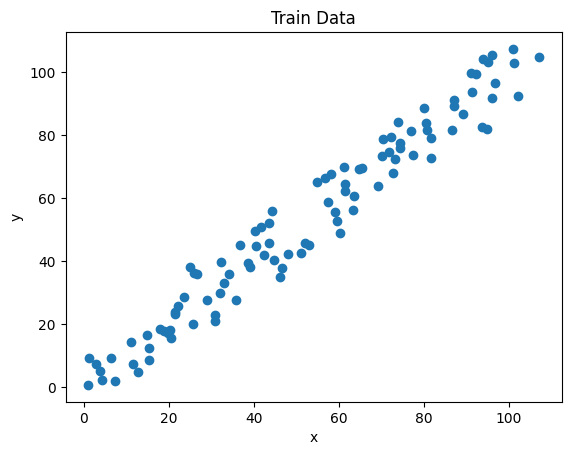

In [10]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Train Data")
plt.show()

In [11]:
X = tfc.placeholder("float")
Y = tfc.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [12]:
learning_rate = 0.01
training_epochs = 1000

In [13]:
y_pred = tf.add(tf.multiply(X, W), b)
 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x))
 
optimizer_gradient = tfc.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
init = tfc.global_variables_initializer()

In [14]:
with tfc.Session() as sess:
    sess.run(init)
     
    for epoch in range(training_epochs):
         

        for (_x, _y) in zip(x, y):
            sess.run(optimizer_gradient, feed_dict = {X : _x, Y : _y})
         
    
        if (epoch + 1) % 50 == 0:
    
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 19.81692 W = 1.0163852 b = -0.007871013
Epoch 100 : cost = 19.822712 W = 1.0150747 b = 0.12445287
Epoch 150 : cost = 19.833109 W = 1.01385 b = 0.24811581
Epoch 200 : cost = 19.84718 W = 1.0127054 b = 0.36368322
Epoch 250 : cost = 19.864128 W = 1.0116358 b = 0.47168753
Epoch 300 : cost = 19.883297 W = 1.0106363 b = 0.57262254
Epoch 350 : cost = 19.904102 W = 1.0097021 b = 0.6669498
Epoch 400 : cost = 19.926077 W = 1.008829 b = 0.7551046
Epoch 450 : cost = 19.948833 W = 1.0080131 b = 0.837492
Epoch 500 : cost = 19.97203 W = 1.0072507 b = 0.91448456
Epoch 550 : cost = 19.995392 W = 1.006538 b = 0.986438
Epoch 600 : cost = 20.018703 W = 1.0058721 b = 1.0536819
Epoch 650 : cost = 20.041773 W = 1.0052497 b = 1.1165227
Epoch 700 : cost = 20.06446 W = 1.0046682 b = 1.1752491
Epoch 750 : cost = 20.086636 W = 1.0041246 b = 1.2301295
Epoch 800 : cost = 20.10822 W = 1.0036166 b = 1.2814283
Epoch 850 : cost = 20.129147 W = 1.0031419 b = 1.3293637
Epoch 900 : cost = 20.149357 W = 1

In [15]:
predictions = weight * x + bias
print("Training cost =", training_cost, 
      "Weight =", weight, 
      "bias =", bias)

Training cost = 20.187502 Weight = 1.001896 bias = 1.4551669


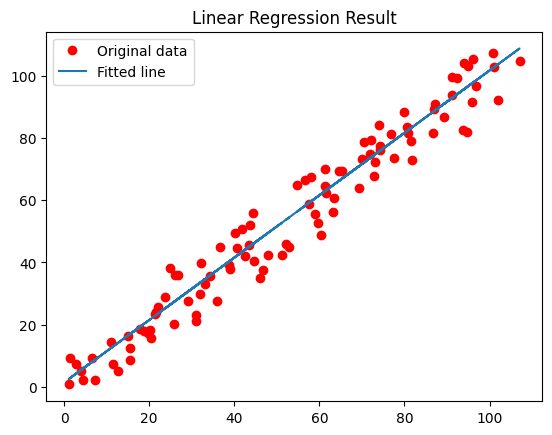

In [16]:
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()